## 自己組織化マップ（SOM）

### 自己組織化マップとは？

**自己組織化マップ(SOM)**は、教師なし人工ニューラルネットワークの一種で、主にクラスタリングと高次元データの可視化に使用されます。Teuvo Kohonen によって開発されたこの手法は、データのトポロジ構造を保持しながら次元を削減し、複雑なデータセットの直感的な可視化を可能にします。

### SOMの主要な概念

1. **教師なし学習**:
   - SOMはラベル付けされたデータを必要とせず、事前定義されたターゲット値なしで動作します。代わりに、入力データ内のパターンを見つけ、類似した入力ベクトルをまとめて整理します。

2. **グリッドベースの構造**:
   - SOMは出力グリッド（通常は2D長方形または六角形）で構成され、各グリッドセルがニューロンまたは「ユニット」を表します。各ニューロンには、入力データと同じ次元を持つ重みベクトルが関連付けられています。

3. **トポロジ構造の保持**:
   - SOMは入力データの空間構造を保持し、類似したデータポイントがグリッド内で隣接するニューロンにマッピングされるようにします。

### SOMの動作原理

SOMのトレーニングプロセスは、グリッドの重みベクトルを入力データのパターンに合わせて反復的に調整することを含みます。このプロセスは3つの主要なステップに分けられます：

1. **初期化**:
   - SOMの重みベクトルを、ランダムに、入力データのスケールに類似した値で初期化します。

2. **競争プロセス**:
   - 各入力ベクトルに対して、最小距離（通常はユークリッド距離）を持つ「最適一致ユニット（BMU）」を特定します。

3. **ニューロンの更新**:
   - BMUとその隣接ニューロンを入力ベクトルに近づけるよう調整します。このプロセスでは以下の2つの主要パラメータを使用します：
     - **学習率**: 各イテレーションで重みをどの程度調整するかを決定します。
     - **近隣関数**: BMUが隣接ニューロンに与える影響範囲を定義します。この影響は時間とともに減少し、最終的にはBMU単独で更新が行われるようになります。

### SOMトレーニングの主要パラメータ

- **学習率**: SOMが入力データに適応する速度を制御します。時間とともに減少し、マップが安定します。
- **近隣関数**: 各更新で影響を受けるBMU周辺の領域を定義します。この関数も時間とともに減衰し、トレーニングの進行に伴ってマップが微調整されます。

### SOMの応用

自己組織化マップは、クラスタリングや次元削減が求められるさまざまな分野で広く使用されています：

- **データ可視化**: 高次元データを解釈可能な2Dマップに表現する。
- **クラスタリングとパターン認識**: 複雑なデータセット内のパターンを特定する。
- **異常検出**: クラスターに属さないデータポイントを特定して外れ値を検出する。

### 長所と短所

- **長所**:
  - 高次元データの可視化とクラスタリングに効果的。
  - データのトポロジ構造を保持し、データセット内の関係を直感的に探ることが可能。

- **短所**:
  - グリッドが大きかったり高次元データを扱う場合、トレーニングプロセスは計算コストが高くなる。
  - 非常に大規模なデータセットにはスケーリングが難しいことがある。また、出力は初期重みによる影響を受ける可能性がある。

---


#

# 数学的説明

### トレーニングプロセス：
1. SOMグリッドはランダムな重みで開始されます。
2. 各入力データについて、特徴空間での近さに基づいてBMU（Best Matching Unit）が特定されます。
3. BMUとその近隣のノードは、入力データにより近づくように重みを調整します。
4. 時間の経過とともに学習率と近隣半径が減少し、調整がより細かくなります。
5. トレーニング後、類似した入力がグリッド上で近隣のノードにマッピングされます。

このプロセスにより、SOMは入力空間の意味のある表現を自己組織化し、トポロジ関係を保持します。

---

### 1. **初期化**
SOMグリッド内の各ノード（ニューロン）は、入力データと同じ次元を持つ重みベクトル $ \mathbf{w}_{i} $ で初期化されます。この重みは通常ランダムに設定されます。

$$
\mathbf{w}_{i}(0) \sim \text{Uniform}[0, 1], \quad i = 1, 2, \dots, N
$$

ここで、$ N $ はSOMグリッド内のノード数です。

---

### 2. **入力サンプル**
各トレーニングステップ $ t $ において、データセットからサンプルベクトル $ \mathbf{x} \in \mathbb{R}^d $ がランダムに選択されます。

---

### 3. **最適一致ユニット（BMU）**
BMUは、入力ベクトル $ \mathbf{x} $ に対して、重みベクトルが最も近いノードです（ユークリッド距離で計算）。数学的には以下のように表されます：

$$
\text{BMU} = \arg \min_{i} \|\mathbf{x} - \mathbf{w}_{i}(t)\|
$$

ここで：
- $ \|\mathbf{x} - \mathbf{w}_{i}\| = \sqrt{\sum_{j=1}^d (x_j - w_{i,j})^2} $
- $ \mathbf{w}_{i} \in \mathbb{R}^d $ は $ i $ 番目のノードの重みベクトルです。

---

### 4. **近隣関数**
BMUとその近隣ノードは各トレーニングステップで更新されます。近隣関数は、BMUが近隣ノードに与える影響を決定します。一般的な選択肢はガウス関数です：

$$
h_{i, \text{BMU}}(t) = \exp\left(-\frac{\|\mathbf{r}_{i} - \mathbf{r}_{\text{BMU}}\|^2}{2\sigma(t)^2}\right)
$$

ここで：
- $ \mathbf{r}_{i} $ と $ \mathbf{r}_{\text{BMU}} $ は、グリッド内の $ i $ 番目のノードとBMUの位置です。
- $ \sigma(t) $ は近隣半径で、時間の経過とともに減少します：
  $$
  \sigma(t) = \sigma_0 \exp\left(-\frac{t}{\tau}\right)
  $$
  ここで $ \sigma_0 $ は初期半径、$ \tau $ は時間定数です。

---

### 5. **学習率**
学習率は、重みの更新ステップの大きさを制御します。時間の経過とともに収束を可能にするために減少します：

$$
\eta(t) = \eta_0 \exp\left(-\frac{t}{\tau}\right)
$$

ここで：
- $ \eta_0 $ は初期学習率。
- $ \tau $ は時間定数。

---

### 6. **重みの更新**
BMUとその近隣ノードの重みベクトルは、入力ベクトル $ \mathbf{x} $ に近づくように更新されます。更新ルールは以下の通りです：

$$
\mathbf{w}_{i}(t+1) = \mathbf{w}_{i}(t) + \eta(t) h_{i, \text{BMU}}(t) (\mathbf{x} - \mathbf{w}_{i}(t))
$$

ここで：
- $ \mathbf{w}_{i}(t) $ は時間 $ t $ におけるノード $ i $ の重みベクトルです。
- $ \mathbf{x} $ は入力ベクトルです。
- $ \eta(t) $ は学習率です。
- $ h_{i, \text{BMU}}(t) $ は近隣関数です。

---

### 7. **複数の反復の繰り返し**
ステップ2～6を所定の反復回数または収束まで繰り返します。

---

### 主要な数式の要約
1. **BMUの識別**：
   $$
   \text{BMU} = \arg \min_{i} \|\mathbf{x} - \mathbf{w}_{i}(t)\|
   $$
2. **近隣関数**：
   $$
   h_{i, \text{BMU}}(t) = \exp\left(-\frac{\|\mathbf{r}_{i} - \mathbf{r}_{\text{BMU}}\|^2}{2\sigma(t)^2}\right)
   $$
3. **重みの更新**：
   $$
   \mathbf{w}_{i}(t+1) = \mathbf{w}_{i}(t) + \eta(t) h_{i, \text{BMU}}(t) (\mathbf{x} - \mathbf{w}_{i}(t))
   $$

---

### 重要なパラメータ：
- $ \eta(t) $：学習率。重み更新の大きさを制御します。
- $ \sigma(t) $：近隣半径。BMUの影響範囲を制御します。


# Python Coding

## 必要なライブラリのインポート
データ処理（pandas、numpy）、可視化（matplotlib）基本的なライブラリをインポートします。さらに、3Dプロット用の`mpl_toolkits.mplot3d`もインポートします。


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rand

## データの読み込みと表示

CSVファイルからデータセットを`pandas`のデータフレームに読み込み、最初の数行を表示して内容を確認します。

その後、効率的な数値計算のためにデータを2Dの`numpy`配列に変換します。


In [11]:
# Load data from CSV and display the first few rows
df = pd.read_csv('test_data.csv')
print(df.head())

# Extract values from DataFrame as a 2D numpy array
input_data = df.values

          X         Y         Z
0  0.812327  0.385401  0.359206
1  0.868781  0.259367  0.273578
2  0.814705  0.393944  0.246055
3  0.622144  0.468073  0.287725
4  0.790177  0.315158  0.372890


## 入力データを3D空間で可視化

データセットを3D空間で可視化します。各データポイントの最初の3次元（x, y, z座標）を使用します。


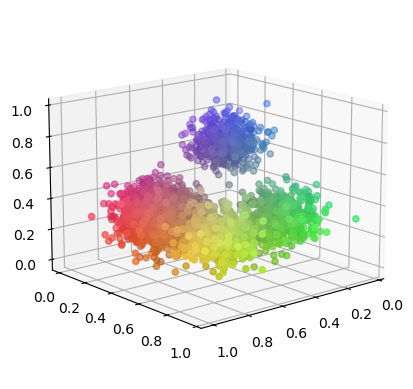

In [12]:
# Plot data in 3D space for visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x_coords, y_coords, z_coords = input_data[:, 0], input_data[:, 1], input_data[:, 2]  # Extract x, y, z components
ax.scatter(x_coords, y_coords, z_coords, marker='o', c=input_data)  # Plot data points in 3D
ax.view_init(15, 50)  # Set initial view angle for the plot
plt.show()

## データの次元を確認

入力データのサンプル数（行数）と次元数（列数）を表示します。


In [13]:
# Get dimensions of input data
num_samples = input_data.shape[0]  # Number of samples (input vectors)
num_dimensions = input_data.shape[1]  # Number of dimensions per input vector (3 dimensions here)

print('Input data has', num_samples, 'samples (vectors)')
print('Each sample has', num_dimensions, 'dimensions')

Input data has 3500 samples (vectors)
Each sample has 3 dimensions


## SOMグリッドを定義

自己組織化マップ（SOM）のグリッドを50x50グリッドとして定義します。これはニューラルネットワークの出力領域として機能します。


In [14]:
# Set up SOM grid dimensions
grid_rows = 50  # Number of rows in SOM grid
grid_cols = 50  # Number of columns in SOM grid
print('SOM output domain (neural networks) is a rectangular grid')

SOM output domain (neural networks) is a rectangular grid


## トレーニングパラメータの設定

SOMのトレーニングパラメータを設定します。これには、イテレーション数、学習率、および近隣関数の減衰率が含まれます。これらのパラメータは、時間経過に伴う学習の挙動を制御します。


In [15]:
# Define training parameters
num_iterations = 5000  # Total number of training iterations
learning_decay, max_learning_rate, neighborhood_decay = 0.25, 0.1, 0.5  # Learning rate and neighborhood decay parameters
learning_rate_decay_time = num_iterations * learning_decay  # Determines decay rate for learning rate
initial_neighborhood_radius = grid_rows * neighborhood_decay  # Determines initial neighborhood size

## グリッドのインデックスマップを初期化

各SOMグリッドセルにペアの座標（行、列）を割り当てるインデックスマップを作成します。このインデックスは、最適一致ユニット（BMU）からの距離計算に使用されます。


In [16]:
# Create index map for grid, storing row and column indices for each cell
grid_indices = np.zeros([grid_rows, grid_cols, 2])
for row in range(grid_rows):
    for col in range(grid_cols):
        grid_indices[row, col] = row, col  # Assign each cell a (row, column) coordinate

## SOMグリッドをランダム値で初期化

SOMグリッドは、各グリッドセルにランダムな値を設定して初期化されます。


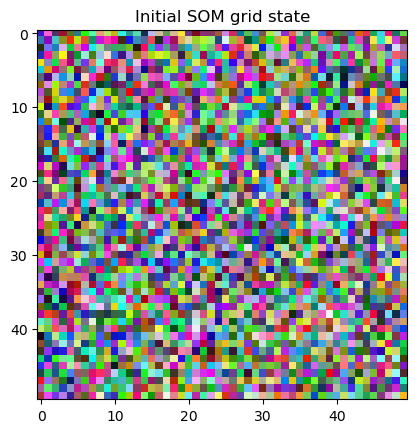

In [17]:
# Initialize SOM grid with random values
som_grid = np.random.uniform(low=0, high=1, size=[grid_rows, grid_cols, num_dimensions])

# Plot the initial SOM grid state
plt.imshow(som_grid)
plt.title("Initial SOM grid state")
plt.show()

## SOMトレーニングループ

このブロックでは、SOMのメイントレーニングループを実行します：

- **ステップ1**: ランダムな入力ベクトルを選択します。
- **ステップ2**: 選択されたベクトルとすべてのグリッドユニットとのユークリッド距離を計算し、最も近いユニット（BMU）を特定します。
- **ステップ3**: 現在の学習率と近隣関数に基づいてSOMグリッドを更新します。BMUに近いグリッドユニットほど大きな更新が行われます。
- **可視化**: 最初のイテレーションで近隣関数をプロットし、トレーニングの進行状況を監視するために特定の間隔でSOMグリッドを表示します。


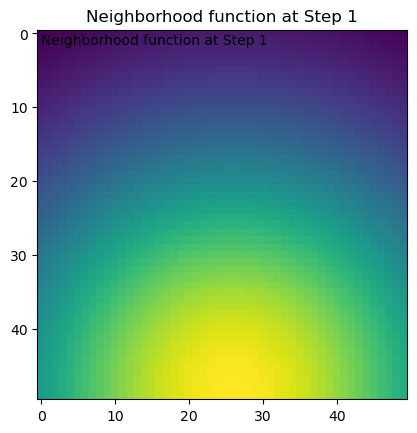

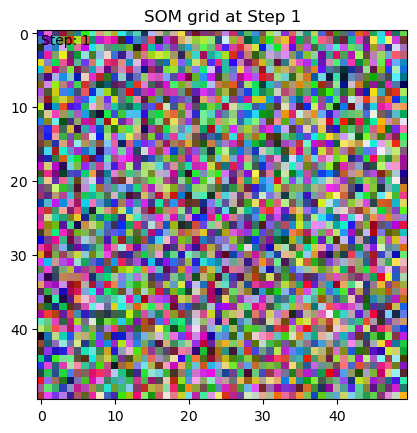

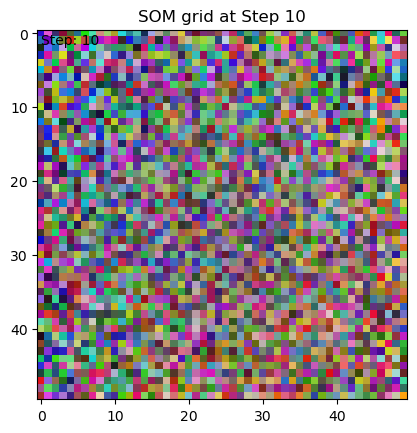

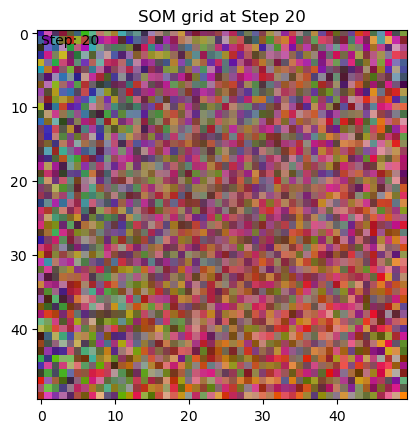

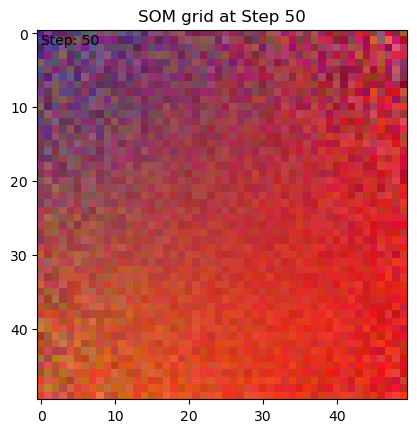

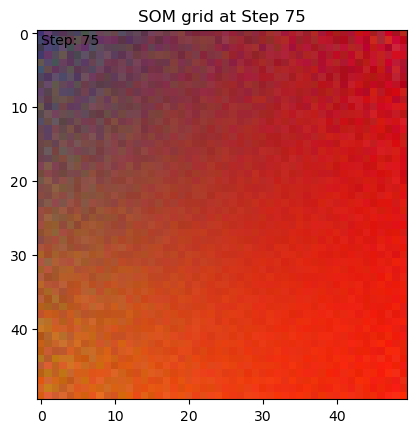

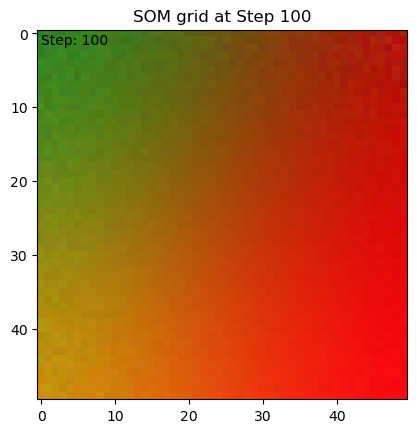

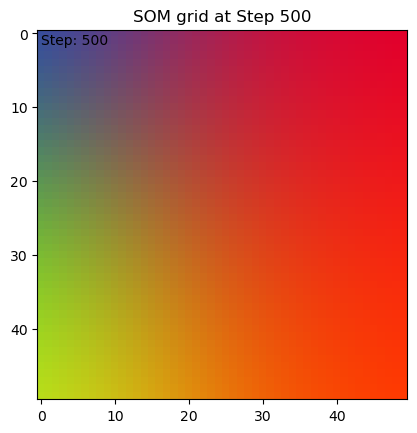

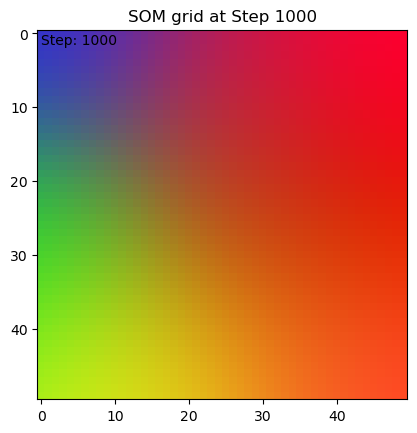

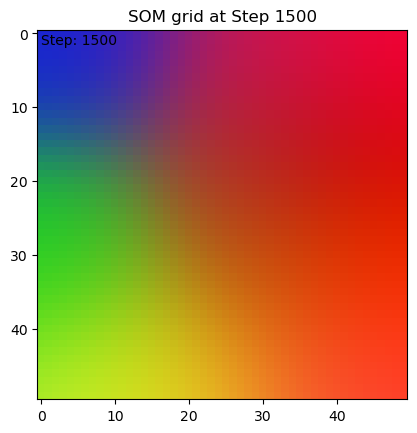

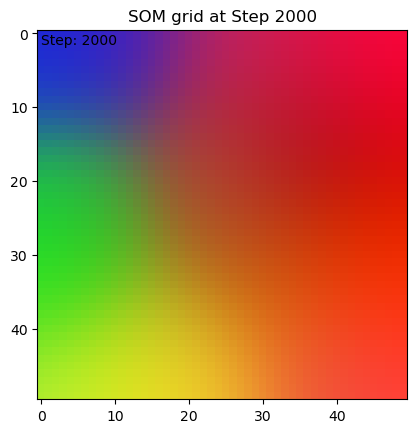

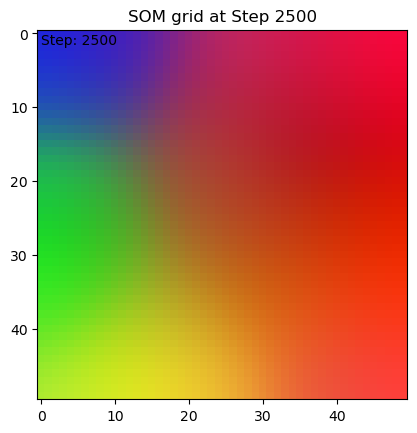

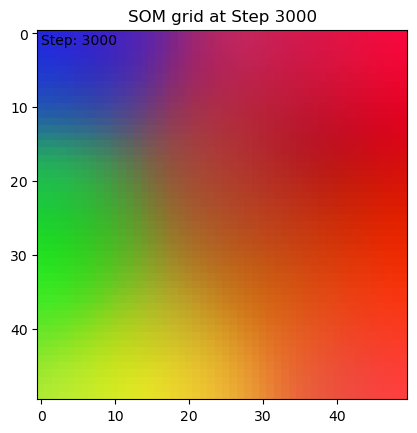

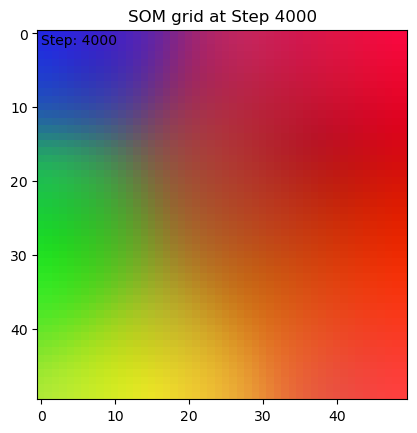

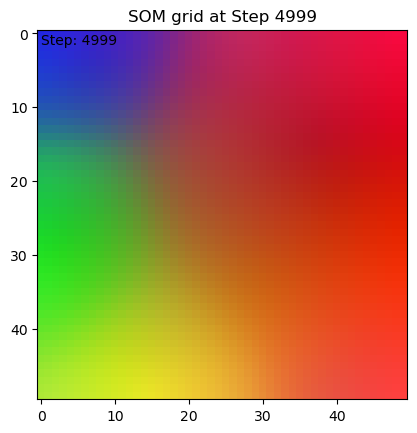

In [18]:
# Training loop for SOM
for iteration in range(num_iterations):
    
    # Step 1: Select a random input vector from the dataset
    random_index = rand.randint(0, input_data.shape[0] - 1)  # Random index selection
    selected_vector = input_data[random_index]  # Selected input vector
    
    # Step 2: Find Best Matching Unit (BMU) on the grid
    
    # Step 2-1: Calculate the difference between the selected input vector and each unit in the SOM grid
    difference = som_grid - selected_vector  # Broadcasts to calculate difference for each dimension
    # Step 2-2: Compute the Euclidean distance for each grid unit from the input vector
    distance_to_input = np.linalg.norm(difference, axis=2)  # Reduces along the dimension axis to get 2D distances
    # Step 2-3: Find the index of the unit with the smallest distance to the input vector
    flat_bmu_index = np.argmin(distance_to_input)  # Finds the flat index of the minimum distance
    bmu_index = np.unravel_index(flat_bmu_index, som_grid.shape[:2])  # Converts flat index to 2D grid coordinates
     
    # Step 3: Update SOM grid
    # Step 3-1: Calculate learning rate and neighborhood function for current iteration
    current_learning_rate = max_learning_rate * np.exp(-iteration / learning_rate_decay_time)  # Decaying learning rate
    current_neighborhood_radius = initial_neighborhood_radius * np.exp(-iteration / learning_rate_decay_time)  # Decaying neighborhood radius
    distance_from_bmu = np.linalg.norm(grid_indices - bmu_index, axis=2)  # Distance from BMU to other cells
    neighborhood_influence = np.exp(-distance_from_bmu**2 / (2 * current_neighborhood_radius**2))  # Neighborhood function (Gaussian decay)

    # Step 3-2: Update grid values based on learning rate and neighborhood function
    som_grid += current_learning_rate * neighborhood_influence[:, :, np.newaxis] * (selected_vector - som_grid)

    # Visualize the neighborhood function at the first iteration
    if iteration == 0:
        plt.imshow(neighborhood_influence)
        plt.title("Neighborhood function at Step 1")
        plt.text(0, 0, 'Neighborhood function at Step 1', va='top')
        plt.show()
        print('=' * 20, '\n' * 10, '=' * 20)

    # Plot the SOM grid state at specific iterations
    if iteration in [1, 10, 20, 50, 75, 100, 500, 1000, 1500, 2000, 2500, 3000, 4000, num_iterations - 1]:
        normalized_grid = (som_grid - som_grid.min()) / (som_grid.max() - som_grid.min())
        plt.imshow(normalized_grid)
        plt.title(f"SOM grid at Step {iteration}")
        plt.text(0, 0, f'Step: {iteration}', va='top')
        plt.show()